In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step - loss: 1.0156 - val_loss: 1.0258
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 1.0038 - val_loss: 1.0279
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.9960 - val_loss: 1.0302
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.9897 - val_loss: 1.0325
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.9864 - val_loss: 1.0350
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.9715 - val_loss: 1.0354
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.9712 - val_loss: 1.0328
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.9717 - val_loss: 1.0298
Epoch 9/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.9649 - val_loss: 1.0264
Epoch 10/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.9594 - val_loss: 1.0228
Epoch 11/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.9562 - val_loss: 1.0194
Epoch 12/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.9514 - val

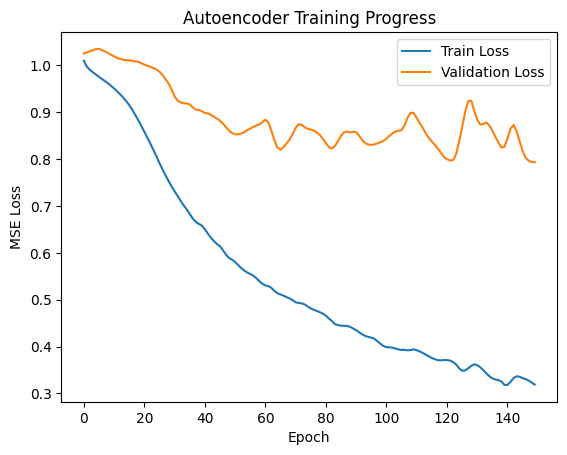

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         8
           1       1.00      0.40      0.57        10

    accuracy                           0.67        18
   macro avg       0.79      0.70      0.65        18
weighted avg       0.81      0.67      0.64        18

F1 Score: 0.5714
AUC-ROC: 0.7125
MCC (Matthews): 0.4781


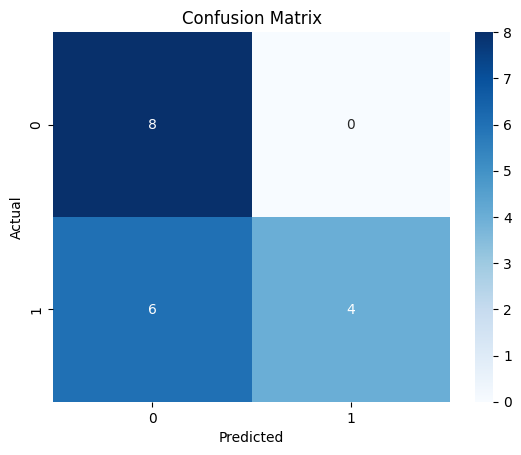

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


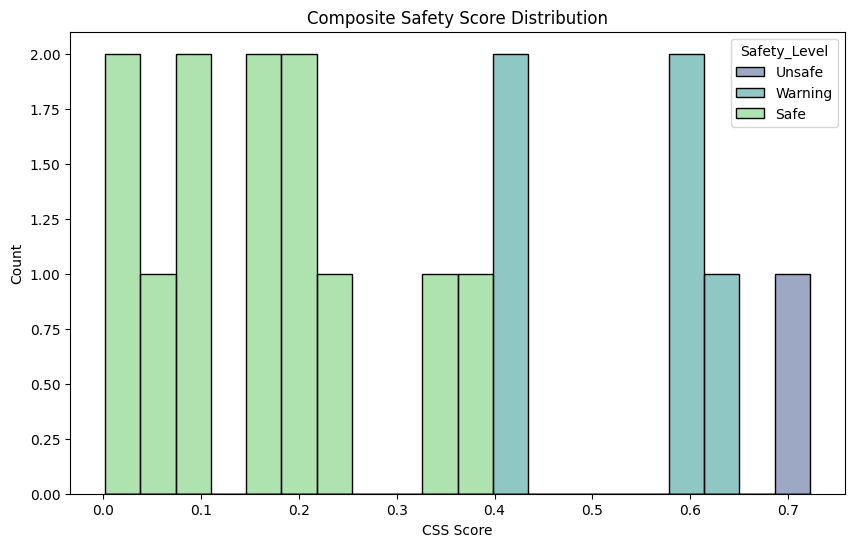

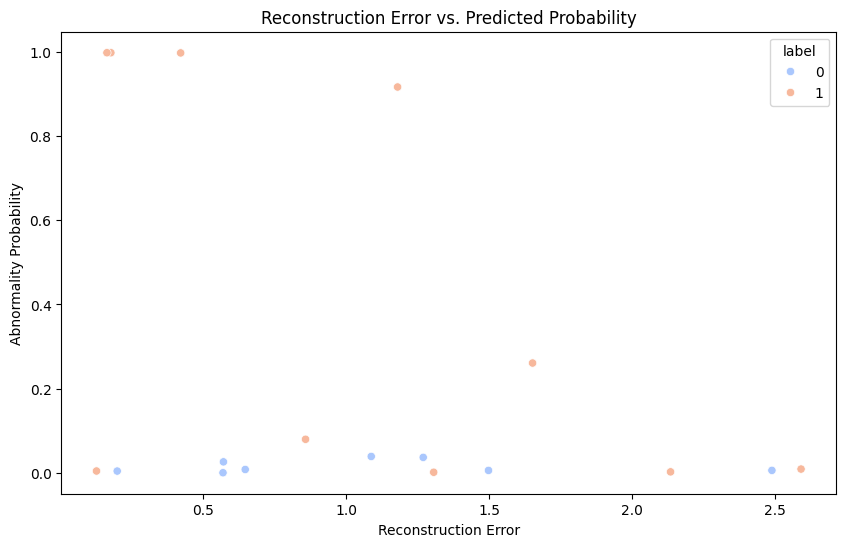


Final Results Preview:
    True_Label  Predicted_Label  Predicted_Probability  Reconstruction_Error  \
27           1                1               0.916627              1.179829   
17           1                0               0.008819              2.591717   
33           0                0               0.000130              0.568847   
57           0                0               0.036569              1.269550   
55           1                0               0.079579              0.857766   

         CSS Safety_Level  
27  0.721972       Unsafe  
17  0.405224      Warning  
33  0.071811         Safe  
57  0.207401         Safe  
55  0.166453         Safe  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    f1_score,
    roc_auc_score,
    matthews_corrcoef,
    classification_report,
    confusion_matrix,
)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns


# Load and prepare data
def load_data(file_path):
    df = pd.read_csv(file_path)
    X = df.drop(columns=["label"])
    y = df["label"].astype(int)
    return X, y


# Preprocessing pipeline
def preprocess_data(X, y):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    # Standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test, scaler


# Autoencoder architecture
def build_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))

    # Encoder
    encoded = Dense(64, activation="relu")(input_layer)
    encoded = Dense(32, activation="relu")(encoded)
    encoded = Dense(16, activation="relu")(encoded)
    encoded = Dense(8, activation="relu")(encoded)  # Bottleneck

    # Decoder
    decoded = Dense(16, activation="relu")(encoded)
    decoded = Dense(32, activation="relu")(decoded)
    decoded = Dense(64, activation="relu")(decoded)
    decoded = Dense(input_dim, activation="linear")(decoded)

    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)

    return autoencoder, encoder


# Main pipeline
def main():
    # Load data
    X, y = load_data(
        "/content/drive/MyDrive/new gait data/Final Data/gait_features_engineered_v2.csv"
    )

    # Preprocess
    X_train, X_test, y_train, y_test, scaler = preprocess_data(X, y)
    input_dim = X_train.shape[1]

    # Build and train autoencoder
    autoencoder, encoder = build_autoencoder(input_dim)
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss="mse")
    history = autoencoder.fit(
        X_train, X_train, epochs=150, batch_size=32, validation_split=0.2, verbose=1
    )

    # Visualize training progress
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Autoencoder Training Progress")
    plt.ylabel("MSE Loss")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()

    # Encode features
    X_train_enc = encoder.predict(X_train)
    X_test_enc = encoder.predict(X_test)

    # Train Gradient Boosting
    gb = GradientBoostingClassifier(
        n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42
    )
    gb.fit(X_train_enc, y_train)

    # Evaluate
    y_pred = gb.predict(X_test_enc)
    y_proba = gb.predict_proba(X_test_enc)[:, 1]

    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")
    print(f"MCC (Matthews): {matthews_corrcoef(y_test, y_pred):.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Composite Safety Score (CSS)
    X_test_recon = autoencoder.predict(X_test)
    recon_error = np.mean(np.square(X_test - X_test_recon), axis=1)

    # Normalize scores
    recon_norm = (recon_error - np.min(recon_error)) / (
        np.max(recon_error) - np.min(recon_error)
    )
    proba_norm = (y_proba - np.min(y_proba)) / (np.max(y_proba) - np.min(y_proba))

    # Weighted CSS (adjust weights based on domain requirements)
    CSS = 0.6 * proba_norm + 0.4 * recon_norm

    # Safety thresholds (validate with domain experts)
    safety_labels = np.where(
        CSS < 0.4, "Safe", np.where(CSS < 0.7, "Warning", "Unsafe")
    )

    # Create results dataframe
    results = pd.DataFrame(
        {
            "True_Label": y_test,
            "Predicted_Label": y_pred,
            "Predicted_Probability": y_proba,
            "Reconstruction_Error": recon_error,
            "CSS": CSS,
            "Safety_Level": safety_labels,
        }
    )

    # Visualize safety distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data=results, x="CSS", hue="Safety_Level", bins=20, palette="viridis")
    plt.title("Composite Safety Score Distribution")
    plt.xlabel("CSS Score")
    plt.ylabel("Count")
    plt.show()

    # Analyze reconstruction errors
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=recon_error, y=y_proba, hue=y_test, palette="coolwarm")
    plt.title("Reconstruction Error vs. Predicted Probability")
    plt.xlabel("Reconstruction Error")
    plt.ylabel("Abnormality Probability")
    plt.show()

    return results


if __name__ == "__main__":
    results = main()
    print("\nFinal Results Preview:")
    print(results.head())

FINAL MODEL

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 255ms/step - loss: 1.0220 - val_loss: 1.0164
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 1.0108 - val_loss: 1.0153
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 1.0088 - val_loss: 1.0150
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 1.0028 - val_loss: 1.0147
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 1.0038 - val_loss: 1.0143
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 1.0010 - val_loss: 1.0145
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.9859 - val_loss: 1.0148
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.9950 - val_loss: 1.0150
Epoch 9/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.9955 - val_loss: 1.0150
Epoch 10/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.9930 - val_loss: 1.0150
Epoch 11/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.9860 - val_loss: 1.0150
Epoch 12/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.9767 - val_l

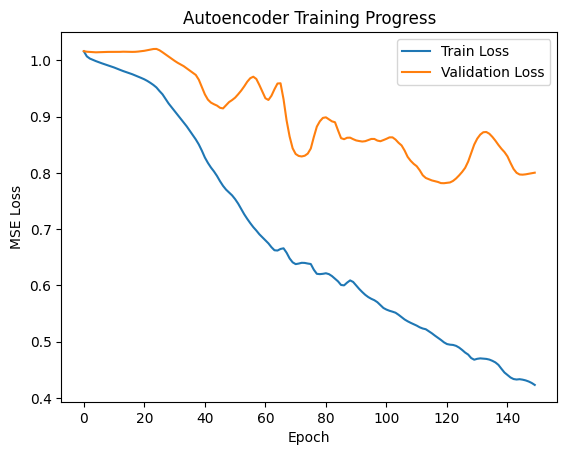

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.70      0.70      0.70        10

    accuracy                           0.67        18
   macro avg       0.66      0.66      0.66        18
weighted avg       0.67      0.67      0.67        18

F1 Score: 0.7000
AUC-ROC: 0.6250


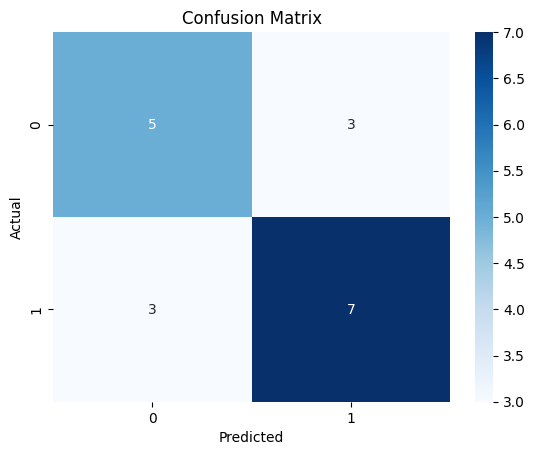

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


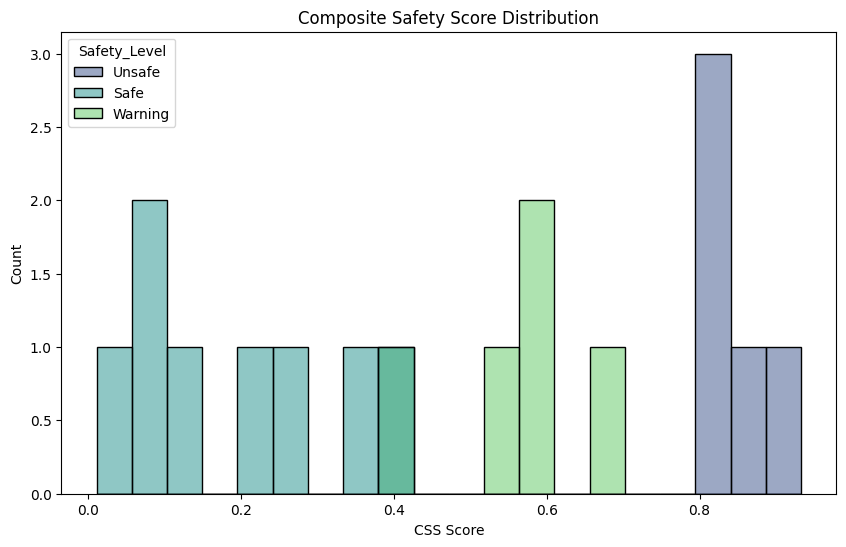

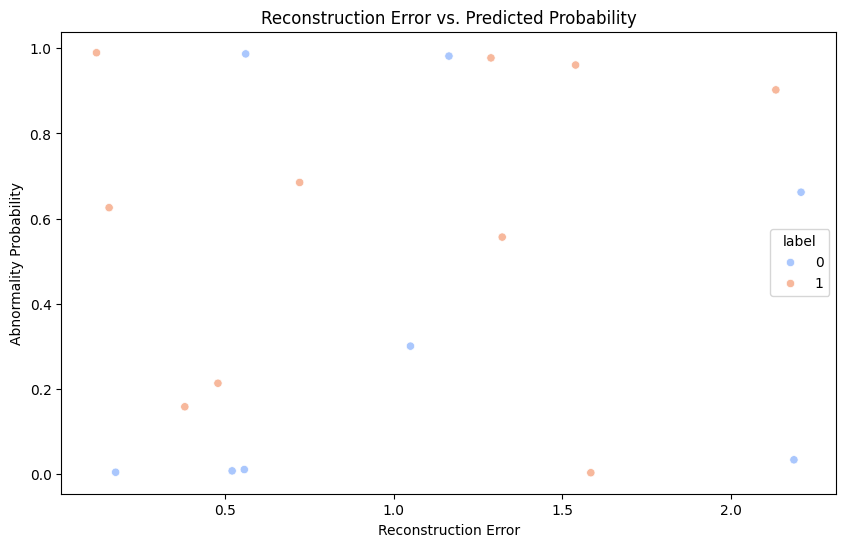


Final Results Preview:
    True_Label  Predicted_Label  Predicted_Probability  Reconstruction_Error  \
27           1                1               0.977151              1.288828   
17           1                0               0.003658              1.585292   
33           0                0               0.007994              0.520414   
57           0                1               0.981433              1.164107   
55           1                1               0.684831              0.720853   

         CSS Safety_Level  
27  0.816550       Unsafe  
17  0.280644         Safe  
33  0.079645         Safe  
57  0.795306       Unsafe  
55  0.529990      Warning  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns


# Load and prepare data
def load_data(file_path):
    df = pd.read_csv(file_path)
    X = df.drop(columns=["label"])
    y = df["label"].astype(int)
    return X, y


# Preprocessing pipeline
def preprocess_data(X, y):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    # Standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test, scaler


# Autoencoder architecture
def build_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))

    # Encoder
    encoded = Dense(64, activation="relu")(input_layer)
    encoded = Dense(32, activation="relu")(encoded)
    encoded = Dense(16, activation="relu")(encoded)
    encoded = Dense(8, activation="relu")(encoded)  # Bottleneck

    # Decoder
    decoded = Dense(16, activation="relu")(encoded)
    decoded = Dense(32, activation="relu")(decoded)
    decoded = Dense(64, activation="relu")(decoded)
    decoded = Dense(input_dim, activation="linear")(decoded)

    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)

    return autoencoder, encoder


# Main pipeline
def main():
    # Load data
    X, y = load_data(
        "/content/drive/MyDrive/new gait data/Final Data/gait_features_engineered_v2.csv"
    )

    # Preprocess
    X_train, X_test, y_train, y_test, scaler = preprocess_data(X, y)
    input_dim = X_train.shape[1]

    # Build and train autoencoder
    autoencoder, encoder = build_autoencoder(input_dim)
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss="mse")
    history = autoencoder.fit(
        X_train, X_train, epochs=150, batch_size=32, validation_split=0.2, verbose=1
    )

    # Visualize training progress
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Autoencoder Training Progress")
    plt.ylabel("MSE Loss")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()

    # Encode features
    X_train_enc = encoder.predict(X_train)
    X_test_enc = encoder.predict(X_test)

    # Train Gradient Boosting
    gb = GradientBoostingClassifier(
        n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42
    )
    gb.fit(X_train_enc, y_train)

    # Evaluate
    y_pred = gb.predict(X_test_enc)
    y_proba = gb.predict_proba(X_test_enc)[:, 1]

    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Composite Safety Score (CSS)
    X_test_recon = autoencoder.predict(X_test)
    recon_error = np.mean(np.square(X_test - X_test_recon), axis=1)

    # Normalize scores
    recon_norm = (recon_error - np.min(recon_error)) / (
        np.max(recon_error) - np.min(recon_error)
    )
    proba_norm = (y_proba - np.min(y_proba)) / (np.max(y_proba) - np.min(y_proba))

    # Weighted CSS (adjust weights based on domain requirements)
    CSS = 0.6 * proba_norm + 0.4 * recon_norm

    # Safety thresholds (validate with domain experts)
    safety_labels = np.where(
        CSS < 0.4, "Safe", np.where(CSS < 0.7, "Warning", "Unsafe")
    )

    # Create results dataframe
    results = pd.DataFrame(
        {
            "True_Label": y_test,
            "Predicted_Label": y_pred,
            "Predicted_Probability": y_proba,
            "Reconstruction_Error": recon_error,
            "CSS": CSS,
            "Safety_Level": safety_labels,
        }
    )

    # Visualize safety distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data=results, x="CSS", hue="Safety_Level", bins=20, palette="viridis")
    plt.title("Composite Safety Score Distribution")
    plt.xlabel("CSS Score")
    plt.ylabel("Count")
    plt.show()

    # Analyze reconstruction errors
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=recon_error, y=y_proba, hue=y_test, palette="coolwarm")
    plt.title("Reconstruction Error vs. Predicted Probability")
    plt.xlabel("Reconstruction Error")
    plt.ylabel("Abnormality Probability")
    plt.show()

    return results


if __name__ == "__main__":
    results = main()
    print("\nFinal Results Preview:")
    print(results.head())

In [ ]:
import joblib

# Save Gradient Boosting model
joblib.dump(gb, "gb_model.pkl")

# Save Scaler
joblib.dump(scaler, "scaler.pkl")

# Save selected features
selected_features = X.columns.tolist()
joblib.dump(selected_features, "selected_features.pkl")

# Save Autoencoder model
autoencoder.save("ae_model.h5")

print("✅ All model components saved successfully!")